In [1]:
import cv2
import matplotlib.pyplot as plt
from cv2 import dnn_superres
from PIL import Image

In [10]:
# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

In [7]:
# Read image
image = cv2.imread('../../data/generated_old/planet_at_epoch0500.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))

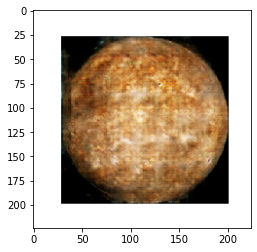

In [8]:
plt.imshow(image)

In [11]:
# Read the desired model
path = "EDSR_x4.pb"
sr.readModel(path)

In [12]:
# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("edsr", 4)

In [13]:
# Upscale the image
result = sr.upsample(image)

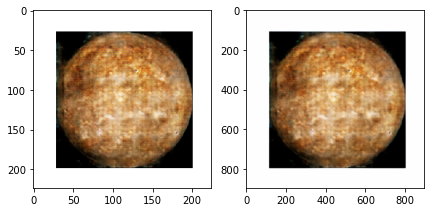

In [14]:
plt.figure(figsize = (7,7))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(result)

In [ ]:
for n,f in enumerate(os.listdir(image_path)):
    # Check if the folder is nested 
    if os.path.isdir(image_path + f):
        for m, img in tqdm.tqdm(enumerate(os.listdir(image_path + f))):
            image = cv2.imread(image_path + f + '/' + img)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, image_size)

            # Upscale image
            start = time.time()
            image = sr.upsample(image)
            print('Upsample:', time.time() - start)
            plt.imsave(f'{store_path}/{n}_{m}_sr.png', image)

    elif os.path.isfile(image_path + f):
        for n,f in enumerate(os.listdir(image_path)):